In [46]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [47]:
tf.__version__

'2.7.0'

# Preprocessing

In [48]:
dataset = pd.read_csv('StudentsPerformance.csv')

dataset.columns=['gender','groups_rac','edu','lunch','mathScore','readingScore','writingScore','result']
#dataset.head()

dataset = pd.concat([dataset,pd.get_dummies(dataset['gender'],prefix='gender',drop_first=True)],axis=1);
dataset.drop(['gender'],axis=1,inplace=True)

dataset


,groups_rac,edu,lunch,mathScore,readingScore,writingScore,result,gender_male
0,group B,bachelor's degree,standard,72,72,74,none,0
1,group C,some college,standard,69,90,88,completed,0
2,group B,master's degree,standard,90,95,93,none,0
3,group A,associate's degree,free/reduced,47,57,44,none,1
4,group C,some college,standard,76,78,75,none,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,standard,88,99,95,completed,0
996,group C,high school,free/reduced,62,55,55,none,1
997,group C,high school,free/reduced,59,71,65,completed,0
998,group D,some college,standard,68,78,77,completed,0


In [49]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['groups_rac'],prefix='groups_rac',drop_first=True)],axis=1);
dataset.drop(['groups_rac'],axis=1,inplace=True)

dataset = pd.concat([dataset,pd.get_dummies(dataset['edu'],prefix='edu',drop_first=True)],axis=1);
dataset.drop(['edu'],axis=1,inplace=True)

dataset.head()

,lunch,mathScore,readingScore,writingScore,result,gender_male,groups_rac_group B,groups_rac_group C,groups_rac_group D,groups_rac_group E,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,edu_some high school
0,standard,72,72,74,none,0,1,0,0,0,1,0,0,0,0
1,standard,69,90,88,completed,0,0,1,0,0,0,0,0,1,0
2,standard,90,95,93,none,0,1,0,0,0,0,0,1,0,0
3,free/reduced,47,57,44,none,1,0,0,0,0,0,0,0,0,0
4,standard,76,78,75,none,1,0,1,0,0,0,0,0,1,0


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['lunch'] = le.fit_transform(dataset['lunch']) 

map_dic = {"none":0,"completed":1}
dataset['result'] = dataset['result'].map(map_dic)

dataset = dataset[["gender_male","groups_rac_group B","groups_rac_group C","groups_rac_group D","groups_rac_group E",
                   "edu_some high school","edu_bachelor's degree","edu_high school","edu_master's degree","edu_some college",
                   "lunch","mathScore","readingScore","writingScore","result"]]

dataset.tail()

,gender_male,groups_rac_group B,groups_rac_group C,groups_rac_group D,groups_rac_group E,edu_some high school,edu_bachelor's degree,edu_high school,edu_master's degree,edu_some college,lunch,mathScore,readingScore,writingScore,result
995,0,0,0,0,1,0,0,0,1,0,1,88,99,95,1
996,1,0,1,0,0,0,0,1,0,0,0,62,55,55,0
997,0,0,1,0,0,0,0,1,0,0,0,59,71,65,1
998,0,0,0,1,0,0,0,0,0,1,1,68,78,77,1
999,0,0,0,1,0,0,0,0,0,1,0,77,86,86,0


In [51]:
X = dataset.iloc[:, :-1].values
y = dataset['result'].values
print(X[0])


[ 0  1  0  0  0  0  1  0  0  0  1 72 72 74]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )

In [53]:
print(X_test)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_test)

[[  0   0   0 ...  97 100 100]
 [  0   0   0 ...  69  65  74]
 [  1   0   0 ...  61  55  52]
 ...
 [  0   0   0 ...  38  49  45]
 [  1   0   1 ...  62  55  49]
 [  0   0   0 ...  59  67  61]]


# ANN

In [54]:
ann = tf.keras.models.Sequential()

In [55]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [56]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [57]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [58]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
history = ann.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 0s 833us/step - loss: 0.6792 - accuracy: 0.5813
Epoch 2/100
25/25 [==============================] - 0s 792us/step - loss: 0.6065 - accuracy: 0.6812
Epoch 3/100
25/25 [==============================] - 0s 775us/step - loss: 0.5908 - accuracy: 0.6900
Epoch 4/100
25/25 [==============================] - 0s 718us/step - loss: 0.5755 - accuracy: 0.7038
Epoch 5/100
25/25 [==============================] - 0s 666us/step - loss: 0.5619 - accuracy: 0.7100
Epoch 6/100
25/25 [==============================] - 0s 750us/step - loss: 0.5522 - accuracy: 0.7237
Epoch 7/100
25/25 [==============================] - 0s 800us/step - loss: 0.5375 - accuracy: 0.7337
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5246 - accuracy: 0.7325
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7487
Epoch 10/100
25/25 [==============================] - 0s 839us/step - loss: 0.5016 - accuracy: 

In [62]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 1]

# confusion_matrix && accuracy_score

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[96 27]
 [44 33]]


0.645

# ROC Model

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [65]:
y_pred = ann.predict(X_test).ravel()
print(X_test)

[[-0.98265048 -0.46653619 -0.70181003 ...  2.02451258  2.09041182
   2.10678537]
 [-0.98265048 -0.46653619 -0.70181003 ...  0.18568841 -0.28284086
   0.39635853]
 [ 1.01765584 -0.46653619 -0.70181003 ... -0.33968993 -0.96091306
  -1.05092572]
 ...
 [-0.98265048 -0.46653619 -0.70181003 ... -1.85015264 -1.36775638
  -1.51142525]
 [ 1.01765584 -0.46653619  1.42488702 ... -0.27401764 -0.96091306
  -1.24828266]
 [-0.98265048 -0.46653619 -0.70181003 ... -0.47103451 -0.14722643
  -0.45885489]]


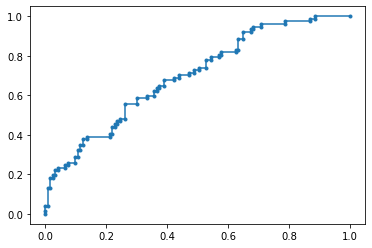

In [66]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [67]:
print(ann.predict(sc.transform([[ 0 , 1,  0,  0 , 0  ,0  ,1 , 0 , 0  ,0  ,1, 72, 72, 74]])) > 0.8)

[[False]]


In [68]:
print(ann.predict(sc.transform([[0 , 1,  0,  0 , 0  ,0  ,1 , 0 , 0  ,0  ,1, 72, 72, 74]])))

[[0.02008438]]


# accurancy curve

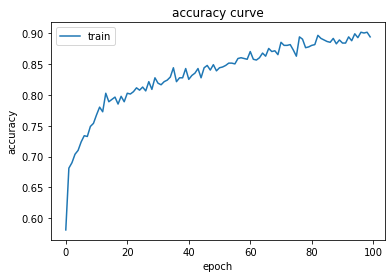

In [69]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('accuracy curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()

# loss curve

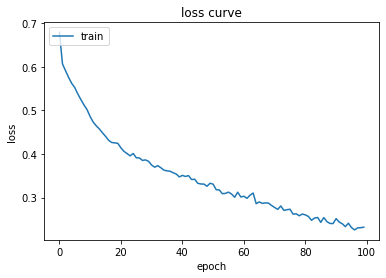

In [70]:
plt.plot(history.history['loss'])
plt.title('loss curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'] , loc='upper left')
plt.show()